# 1. Import relevant libraries

In [36]:
import numpy as np                                      
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Import csv file

In [37]:
File = pd.read_csv(r"C:\Users\SATWIK MUKHERJEE\Downloads\Telegram Desktop\new_year_sale.csv")       

# 3. Find out no. of rows and no. of columns in the dataframe

In [38]:
row_number = len(File.index)                    
column_number = len(File.columns)
row_number
column_number
print(File.shape)                  ## (row,column)

(11251, 15)


# 4. See first few rows of the dataframe in the notebook itself

In [39]:
first_few_rows = 2
File.head(first_few_rows)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


# 5. Determine the datatype of columns

In [40]:
list_of_columns = File.columns
data_type_list = []
for _ in list_of_columns:
    data_type_list.append(type(File[_][0]))
print(data_type_list)                     ## prints data types of different columns 

[<class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'numpy.int64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>]


# 6. Drop columns which are not related, in your opinion

In [41]:
## Status and unnamed1 only have NaN values, thereby removing them is essential. 
File.drop({"Status", "unnamed1"}, axis = 'columns', inplace = True)
File.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


# 7. Check for null values

In [54]:
file_null_check = File.isnull()
list_of_columns = File.columns
null_tracker = []
for i in range(0,len(list_of_columns)):
    if file_null_check[list_of_columns[i]].any() == True:
     null_tracker.append(list_of_columns[i])
print(null_tracker)                                  ## It shows column names with at least one NaN.

['Amount']


In [55]:
print(File.isnull().sum())                           ## Provides number of null values in each columns.

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [56]:
print(f"The column name with null value is: 'Amount': {File['Amount'].isna().sum()}.")

The column name with null value is: 'Amount': 12.


# 8. Drop null values from the dataframe

In [57]:
File.dropna(axis = 0, how = 'any', inplace = True)             ## if any row has a NaN then removes the entire row.
File.info()
#mean_value = File['Amount'].mean()
#updated_File = File.replace(np.nan, mean_value)               ## Fills Nan with the Mean value. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [60]:
File.isnull().sum()           ## Shows that file has no NaN values.

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# 9. Change the data type of columns, wherever required

In [62]:
print(File.dtypes)
File.head(2)         ## User_ID and Marital_Status can be changed to strings.

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [63]:
File = File.astype({"User_ID":'str', "Marital_Status":'str'})

# 10. Verify the changed data type of columns

In [64]:
print(File.dtypes)        ## dtypes have been changed. 

User_ID              object
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status       object
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object


In [65]:
print(type(File['User_ID'][0]))
print(type(File['Marital_Status'][0]))

<class 'str'>
<class 'str'>


# 11. Print columns name in a list

In [68]:
list_columns = []
for _ in list_of_columns:
     list_columns.append(_)
print(list_columns)   

['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount']


# 12. Change column name 'Marital_Status' to 'Whether_married' and 'Cust_name' to 'Customer_name' permanently

In [69]:
File.rename(columns = {File.columns[1]:'Customer_name', File.columns[6]: 'Whether_married'}, inplace = True)

In [70]:
print(File.columns)      ## already changed. 

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Whether_married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


# 13. Return the description of all the columns (count, mean, std etc.)

In [71]:
print(File.describe())

                Age        Orders        Amount
count  11239.000000  11239.000000  11239.000000
mean      35.410357      2.489634   9453.610858
std       12.753866      1.114967   5222.355869
min       12.000000      1.000000    188.000000
25%       27.000000      2.000000   5443.000000
50%       33.000000      2.000000   8109.000000
75%       43.000000      3.000000  12675.000000
max       92.000000      4.000000  23952.000000


# 13. Return the description of these specific columns only: Age, Orders, Amount

In [72]:
print(File[['Age', 'Orders', 'Amount']].describe())

                Age        Orders        Amount
count  11239.000000  11239.000000  11239.000000
mean      35.410357      2.489634   9453.610858
std       12.753866      1.114967   5222.355869
min       12.000000      1.000000    188.000000
25%       27.000000      2.000000   5443.000000
50%       33.000000      2.000000   8109.000000
75%       43.000000      3.000000  12675.000000
max       92.000000      4.000000  23952.000000


# 14 Determine how much sum of amount males and females spent separately. Sort that amount in descending order

In [73]:
File.head(2)

,User_ID,Customer_name,Product_ID,Gender,Age Group,Age,Whether_married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [74]:
print(File.groupby('Gender').sum().sort_values("Amount", axis = 0, ascending = False)['Amount'])

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64


# 15. Draw a histogram of column Age, Resize the figure

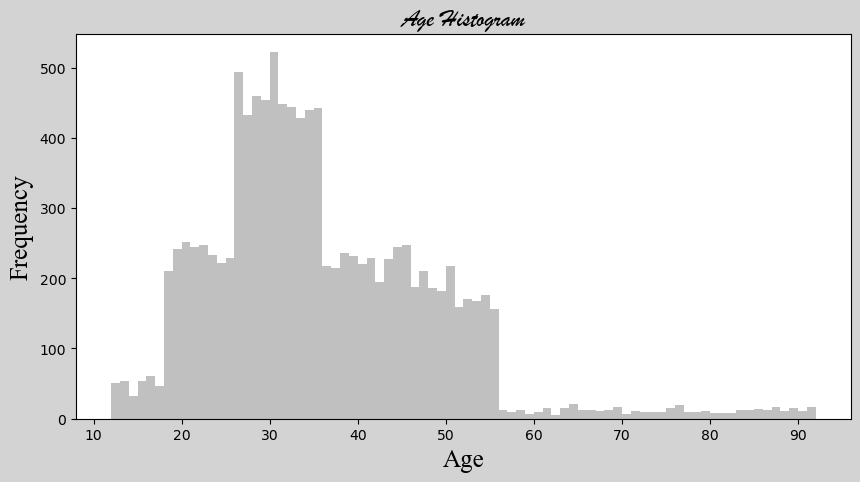

In [75]:
dt = File['Age']
distinct = dt.nunique()
plt.figure(figsize = (10, 5), facecolor = 'lightgray', edgecolor = 'dimgrey')
plt.hist(dt, bins = np.linspace(min(dt), max(dt), distinct), color = "silver")
plt.xlabel("Age", fontname="Times New Roman", fontsize=18)
plt.ylabel("Frequency", fontname="Times New Roman", fontsize=18)
plt.title('Age Histogram', fontname="Brush Script MT", fontsize=18)
plt.show()

# 16. compare on barchat how many married males are there in states: Delhi, Gujarat, Rajasthan, Telangana

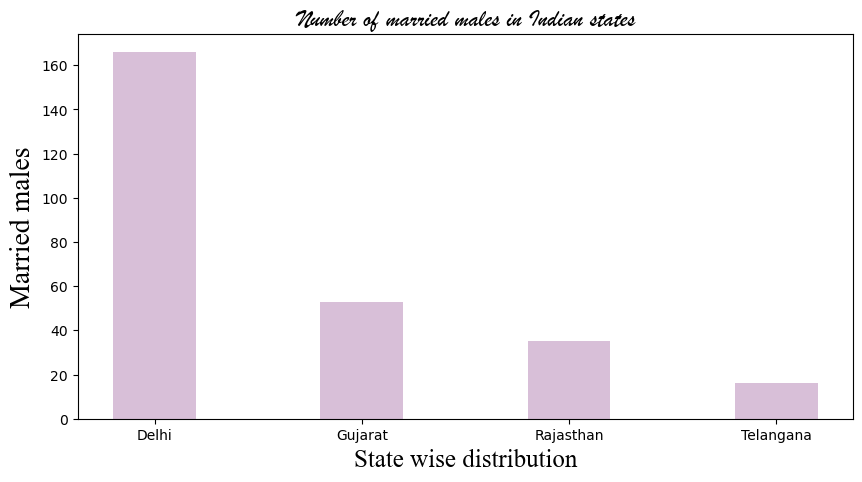

In [76]:
# creating the dataset
condition1 = File[File['Gender'].apply(lambda x : 'M' in x)]
condition2 = condition1[condition1['Whether_married'].apply(lambda x : '1' in x)]
data = {'Delhi': condition2['State'].apply(lambda x : 'Delhi' in x).sum(), 'Gujarat': condition2['State'].apply(lambda x : 'Gujarat' in x).sum(), 
        'Rajasthan': condition2['State'].apply(lambda x : 'Rajasthan' in x).sum(),
        'Telangana': condition2['State'].apply(lambda x : 'Telangana' in x).sum()}
states = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(states, values, color ='thistle',
        width = 0.4)
plt.xlabel("State wise distribution", fontname="Times New Roman", fontsize=18)
plt.ylabel("Married males", fontname="Times New Roman", fontsize=20)
plt.title("Number of married males in Indian states", fontname="Brush Script MT", fontsize=18)
plt.show()

# 17. With condition same as in previous question, Draw a scatter plot with Amount on y-axis and Age on x-axis 

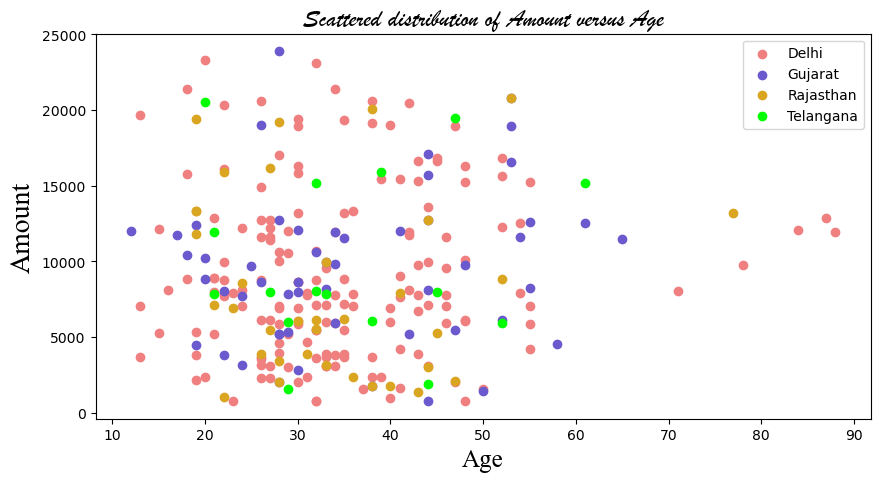

In [79]:
# creating the dataset
condition1 = File[File['Gender'].apply(lambda x : 'M' in x)]
condition2 = condition1[condition1['Whether_married'].apply(lambda x : '1' in x)]
data_plot = condition2[condition2['State'].apply(lambda x : ('Delhi') in x)]
data_plot2 = condition2[condition2['State'].apply(lambda x : ('Gujarat') in x)]
data_plot3 = condition2[condition2['State'].apply(lambda x : ('Rajasthan') in x)]
data_plot4 = condition2[condition2['State'].apply(lambda x : ('Telangana') in x)]
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.scatter(data_plot['Age'], data_plot['Amount'], color = 'lightcoral')
plt.scatter(data_plot2['Age'], data_plot2['Amount'], color = 'slateblue')
plt.scatter(data_plot3['Age'], data_plot3['Amount'], color = 'goldenrod')
plt.scatter(data_plot4['Age'], data_plot4['Amount'], color = 'lime')
plt.xlabel("Age", fontname="Times New Roman", fontsize=18)
plt.ylabel("Amount", fontname="Times New Roman", fontsize=20)
plt.title("Scattered distribution of Amount versus Age", fontname="Brush Script MT", fontsize=18)
plt.legend(["Delhi" , "Gujarat", "Rajasthan", "Telangana"], bbox_to_anchor = (1 , 1))
plt.show()

# 18. Get creative and surprise us. (Mandatory)

(Besides questions above, Put into practice knowledge you have acquired as a part of our course so far)

<Figure size 1000x500 with 0 Axes>

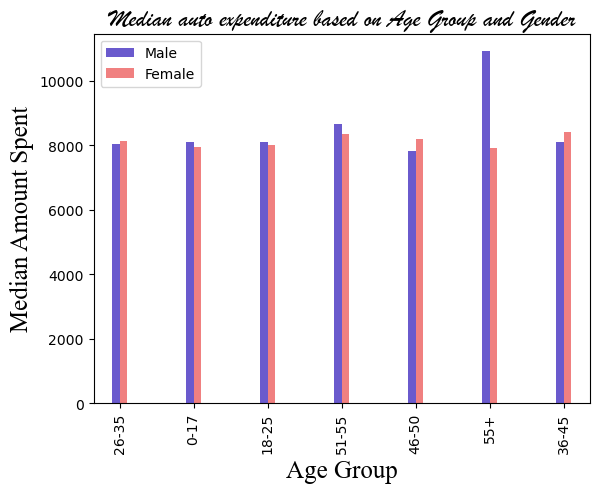

In [82]:
# Amount spent by people in the same age group based on their genders.  
# Findings: Males tend to spend more on auto expenditure in the age group [0-25] and 51+;
#           whereas females spend more in the middle age group [26-50]. The higher usage of private
#           vehicles for transportation purpose can be responsible for a diminishing trend in male expenditure
#           in the middle age group. The sharp rise in median value for men, aged above 55+ is significant. 
Males = File[File['Gender'].apply(lambda x : 'M' in x)]
Females = File[File['Gender'].apply(lambda x : 'F' in x)]
Male_spend = Males.groupby('Age Group').median()['Amount']
Female_spend = Females.groupby('Age Group').median()['Amount']
different_groups = File['Age Group'].unique()
joined_frame = pd.merge(Male_spend, Female_spend, on = 'Age Group')
joined_frame.rename(columns = {joined_frame.columns[0] : 'Male', joined_frame.columns[1] : 'Female'}, inplace = True)
final_dt = pd.DataFrame(joined_frame, columns = ['Male', 'Female'], index = different_groups)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
final_dt.plot.bar(color = ['slateblue', 'lightcoral'], width = 0.2)
plt.xlabel("Age Group", fontname="Times New Roman", fontsize = 18)
plt.ylabel("Median Amount Spent", fontname="Times New Roman", fontsize = 18)
plt.title("Median auto expenditure based on Age Group and Gender", fontname="Brush Script MT", fontsize=18)
plt.show()

<Figure size 1000x500 with 0 Axes>

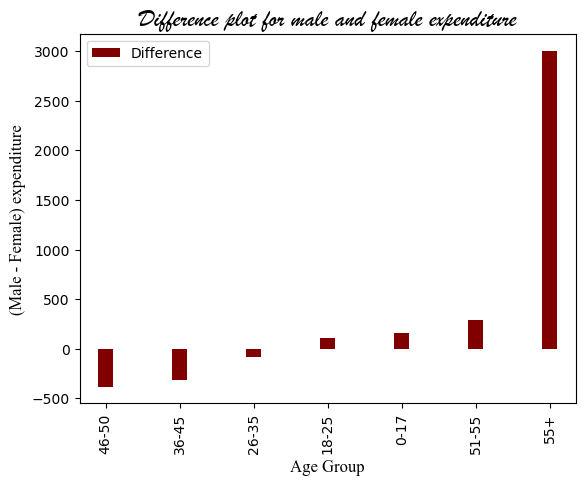

In [83]:
## The differences between Male and Female expenditure on auto is presented in an ascending order. 
difference = pd.Series(Male_spend - Female_spend)
NEW = difference.to_frame()
NEW.rename(columns = {NEW.columns[0] : 'Difference'}, inplace = True)
another_dt = pd.DataFrame(NEW, columns = ['Difference'], index = different_groups)
another_dt = another_dt.sort_values('Difference', ascending = True)
fig = plt.figure(figsize = (10, 5))
another_dt.plot.bar(color = 'maroon', width = 0.2)
# creating the plot
plt.xlabel("Age Group", fontname="Times New Roman", fontsize = 12)
plt.ylabel("(Male - Female) expenditure", fontname="Times New Roman", fontsize = 12)
plt.title("Difference plot for male and female expenditure", fontname="Brush Script MT", fontsize=18)
plt.show()

### Best of Luck

Thank you!